In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_excel('Features_2500RPM_15dB.xlsx')

In [3]:
df.head()

,Mp_1,Mp_2,Mp_3,Mp_4,Mp_5,Mp_6,mu_1,mu_2,mu_3,mu_4,...,fcomp5,fcomp6,fcomb1,fcomb2,fcomb3,fcomb4,fcomb5,fcomb6,4 - Class,14 - Class
0,0.892484,0.903392,0.984521,0.874665,0.877234,0.877632,0.952662,0.989001,0.968475,0.969382,...,0.078297,0.092574,0.082542,0.063601,0.006849,0.088690,0.036550,0.074167,Normal,Normal
1,0.890017,0.893384,0.915596,0.890610,0.944422,0.870963,0.949758,0.966988,0.975931,0.982762,...,0.028166,0.060277,0.000386,0.002187,0.034763,0.059367,0.016366,0.000852,Normal,Normal
2,0.867129,0.878478,0.890852,0.877666,0.881636,0.873732,0.948043,0.983933,0.972557,0.966634,...,0.068713,0.050902,0.072902,0.081556,0.028206,0.034403,0.023601,0.059234,Normal,Normal
3,0.902448,0.860836,0.891107,0.910442,0.926073,0.920867,0.940004,0.972579,0.988736,0.975196,...,0.033542,0.062647,0.080848,0.023474,0.079709,0.063073,0.025278,0.035068,Normal,Normal
4,0.862227,0.878172,0.892573,0.891704,0.876273,0.871364,0.941459,0.977317,0.976607,0.963594,...,0.032978,0.054261,0.049111,0.041923,0.028954,0.068088,0.087484,0.074517,Normal,Normal


In [4]:
df.shape

(3500, 99)

In [5]:
df.isna().sum()

Mp_1          0
Mp_2          0
Mp_3          0
Mp_4          0
Mp_5          0
             ..
fcomb4        0
fcomb5        0
fcomb6        0
4 - Class     0
14 - Class    0
Length: 99, dtype: int64

In [33]:
x=df.iloc[:,:-13].values
y14=df.iloc[:,-1].values
y4=df.iloc[:,-2]

In [34]:
y14.shape

(3500,)

In [7]:
labels=np.unique(y4)
labels

array(['Compression Ratio Reduction in Cylinders', 'Normal',
       'Pressure Reduction In Intake Manifold',
       'Reduction in Amount of Fuel Injected into Cylinders'],
      dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [9]:
y4=lb.fit_transform(y4)
y4

array([1, 1, 1, ..., 3, 3, 3])

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y4,test_size=0.2,random_state=0)

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
#List Hyperparameters that we want to tune.
n_neighbors = list(range(1,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict( n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x_train,y_train)
#Print The value of best Hyperparameters
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 8


In [13]:
kc=KNeighborsClassifier(n_neighbors=8,weights='uniform',metric='minkowski',p=1)

In [14]:
kc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8, p=1)

In [15]:
y_pred=kc.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9757142857142858

In [17]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[288,   0,   0,   0],
       [  3,  44,   0,   7],
       [  0,   0,  53,   0],
       [  1,   6,   0, 298]], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

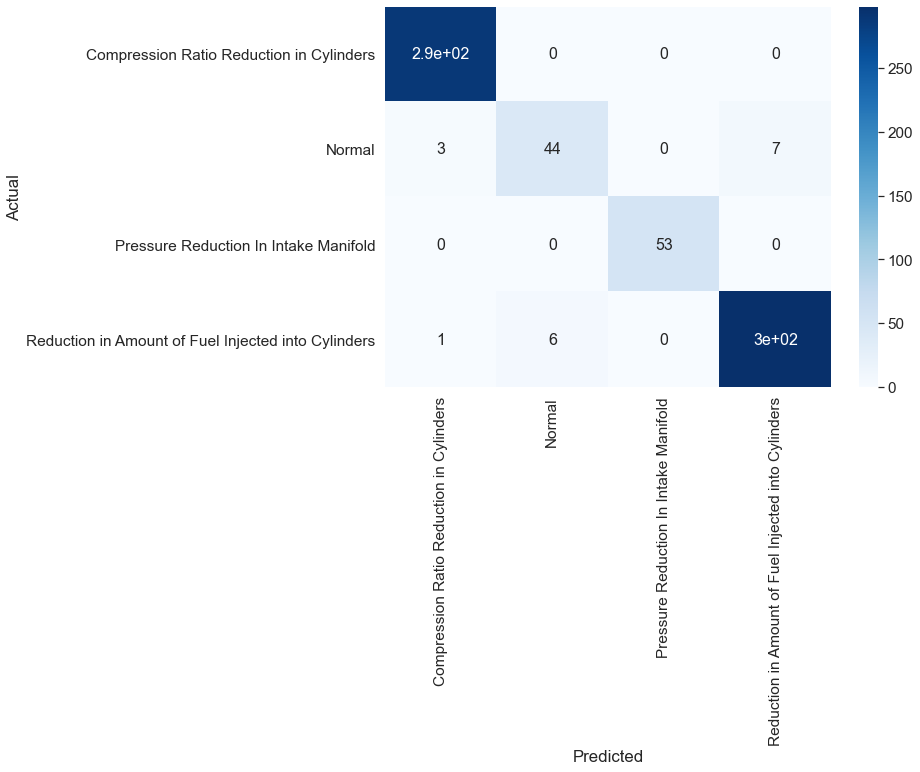

In [18]:
df_cm = pd.DataFrame(cm,index=labels,columns=labels )
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

# 14 class

In [19]:
labels=np.unique(y14)
labels

array(['Compression Ratio Reduction - C1',
       'Compression Ratio Reduction - C2',
       'Compression Ratio Reduction - C3',
       'Compression Ratio Reduction - C4',
       'Compression Ratio Reduction - C5',
       'Compression Ratio Reduction - C6', 'Normal',
       'Pressure Reduction In Intake Manifold',
       'Reduction In Fuel Injected - C1',
       'Reduction In Fuel Injected - C2',
       'Reduction In Fuel Injected - C3',
       'Reduction In Fuel Injected - C4',
       'Reduction In Fuel Injected - C5',
       'Reduction In Fuel Injected - C6'], dtype=object)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y14,test_size=0.2,random_state=0)

In [21]:
# x_train=sc.fit_transform(x_train)
# x_test=sc.fit_transform(x_test)

In [22]:
#List Hyperparameters that we want to tune.
n_neighbors = list(range(1,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict( n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x_train,y_train)
#Print The value of best Hyperparameters
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 9


In [23]:
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier(n_neighbors=9,weights='uniform',metric='minkowski',p=1)
kc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

In [24]:
y_pred=kc.predict(x_test)

In [25]:
accuracy_score(y_test,y_pred)

0.9585714285714285

In [26]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[66,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 50,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  0,  2,  0, 47,  0,  2,  3,  2,  6,  1,  2],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  0, 48,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0, 37,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 52,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 41,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 51]],
      dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

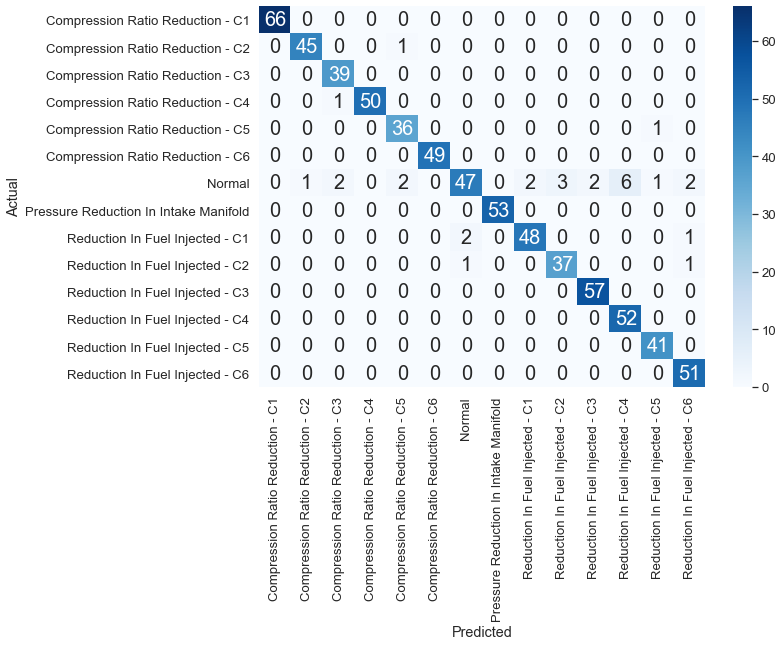

In [27]:
df_cm = pd.DataFrame(cm,columns=labels, index = labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 20})

# Cross validation

In [28]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt=1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(x, y4):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 2800, Test set:700
Fold:2, Train set: 2800, Test set:700
Fold:3, Train set: 2800, Test set:700
Fold:4, Train set: 2800, Test set:700
Fold:5, Train set: 2800, Test set:700


In [29]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski', p=2), x, y4, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: { score}')
print(f'Average score:  {score.mean()}')

Scores for each fold are: [0.95285714 0.95571429 0.94428571 0.94       0.95142857]
Average score:  0.9488571428571427


In [30]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski', p=2), x, y14, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score:  {score.mean()}')

Scores for each fold are: [0.90714286 0.90857143 0.92857143 0.92       0.93428571]
Average score:  0.9197142857142857
